# Pre-Reveal Bids

In [1]:
"""
Update Parameters Here
"""
COLLECTION_NAME = "MekaVerse"
CONTRACT = "0x9A534628B4062E123cE7Ee2222ec20B86e16Ca8F"
YEAR = "2021"
MONTH = "10"
DAY = "13"
HOUR = "15"
MINUTE = "00"

METHOD = "raritytools"
TOKEN_COL = "TOKEN_ID"

In [2]:
"""
@author: mdigi14
"""

import pandas as pd
import matplotlib.pyplot as plt
import datetime

from typing import List, Dict, Any

from honestnft_utils import constants
from honestnft_utils import config
from honestnft_utils import opensea

REVEAL_TIME = "{}-{}-{}T{}:{}:00".format(YEAR, MONTH, DAY, HOUR, MINUTE)
DATETIME_REVEAL_TIME = datetime.datetime.strptime(REVEAL_TIME, "%Y-%m-%dT%H:%M:%S")


"""
Plot params
"""

plt.rcParams.update({"figure.facecolor": "white", "savefig.facecolor": "white"})

"""
Helper Functions
"""


def get_all_bids() -> List[Dict[str, Any]]:
    data = opensea.get_opensea_events(
        contract_address=CONTRACT,
        occurred_before=REVEAL_TIME,
        event_type="bid_entered",
    )

    print("Events returned :", len(data))
    return data

Events returned : 2674
Total bids  2674


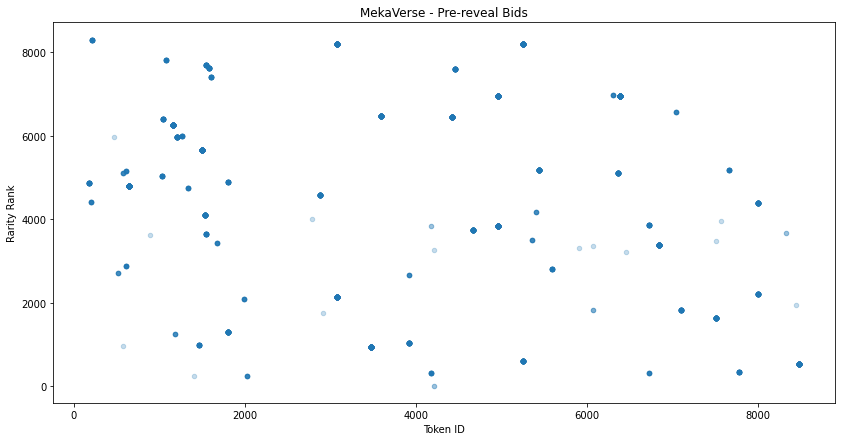

In [3]:
PATH = f"{config.RARITY_FOLDER}/{COLLECTION_NAME}_{METHOD}.csv"
RARITY_DB = pd.read_csv(PATH)

bids = []
events = []

events = get_all_bids()
print("Total bids ", len(events))

for event in events:
    bid_time = datetime.datetime.strptime(event["created_date"], "%Y-%m-%dT%H:%M:%S.%f")
    if bid_time < DATETIME_REVEAL_TIME:

        try:
            tokenId = int(event["asset"]["token_id"])
            bid = dict()
            bid["TOKEN_ID"] = tokenId
            bid["USER"] = event["from_account"]["address"]
            bid["OFFER"] = float(event["bid_amount"]) / constants.ETHER_UNITS  # type: ignore
            bid["DATE"] = event["created_date"]
            bid["RANK"] = int(RARITY_DB[RARITY_DB[TOKEN_COL] == tokenId]["Rank"])
            bids.append(bid)

        except:
            continue


bidding_df = pd.DataFrame(bids)
bidding_df = bidding_df.sort_values(by="DATE")
bidding_df.to_csv(
    f"{config.PRE_REVEAL_BIDS_FOLDER}/{COLLECTION_NAME}_pre-reveal_bids.csv",
    index=False,
)


ax = bidding_df.plot.scatter(
    x="TOKEN_ID",
    y="RANK",
    alpha=0.25,
    title=f"{COLLECTION_NAME} - Pre-reveal Bids",
    figsize=(14, 7),
    xlabel="Token ID",
    ylabel="Rarity Rank",
)